In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [2]:
df = pd.read_csv("../../data/cleaned/movie_meta_cleaned_ver5.csv", engine= "python")

## string to num

In [3]:
col_numeric = ['release_year','release_date', 'runtime', 'imdb_score', 'dvd_sales', 'blu_sales', 'total_sales',
               'legs', 'share', 'inf_income_usa', 'theater_opening', 'theater_total',
               'metascore', 'big_awards_num', 'awards_win_num', 'awards_nomin_num',
               'reviews_users', 'reviews_critics', 'budget', 'series_new', 'income_opening',
               'votes', 'income_usa', 'income_int', 'income_ww', 'contract_price', 'studio_score', 'price_class','contract_year',
               'dvd_over_income', 'movie_down_sales', 'contract_price_inf', 'net_profit', 'studio_score', 'contract_price', 'inf']
for col in col_numeric:
    df[col] = pd.to_numeric(df[col], errors='coerce')

### '.' to Nan

In [4]:
for col in df.columns:
        df.loc[df[col] == '.', col] = np.nan

C:\Users\cresc\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


# 이상치 확인 및 처리

In [5]:
len(df)

5153

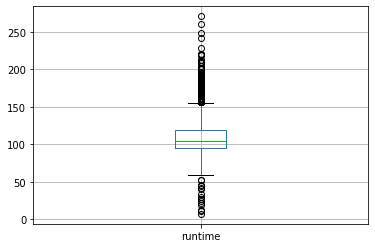

In [6]:
df[['runtime']].boxplot()

In [7]:
df['runtime'].isna().sum()

0

In [8]:
df[df['runtime'] < 50]

,movie_id,title,release_year,release_date,runtime,mpa_rating,imdb_score,dvd_sales,blu_sales,total_sales,...,country_2,country_3,dvd_over_income,movie_down_sales,contract_price_inf,net_profit,studio,studio_score,price_class,contract_price
752,tt0365474,The Making of 'The X Files: Fight the Future',1998.0,36081.0,27.0,NaN,7.4,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
992,tt0349773,The Making of 'Alien 3',1992.0,NaN,22.0,PG-13,6.9,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
1087,tt0775408,'V for Vendetta' Unmasked,2006.0,38792.0,30.0,NaN,7.8,58827369.0,3378266.0,62205635.0,...,NaN,NaN,0.83430,NaN,NaN,NaN,NaN,NaN,10.0,NaN
3010,tt0427498,Mar adentro,2004.0,38261.0,19.0,NaN,7.5,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
3405,tt0953896,The Making of 'Severance',2007.0,39090.0,34.0,NaN,7.1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
3631,tt0245280,Michael Jordan to the Max,2000.0,36651.0,46.0,NOT RATED,7.5,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,20th Century Fox,10.0,1.0,730.0
3878,tt1529567,Sea Rex 3D: Journey to a Prehistoric World,2010.0,40576.0,41.0,NOT RATED,6.7,NaN,NaN,NaN,...,France,NaN,NaN,NaN,NaN,NaN,3D,2.0,1.0,570.0
3914,tt1200853,Stuck,2008.0,39463.0,11.0,NaN,6.5,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
4156,tt1145855,Holly Hobbie and Friends: Best Friends Forever,2007.0,39343.0,44.0,NOT RATED,5.8,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
4209,tt1084715,The Making of 'This Is England',2007.0,39330.0,7.0,TV-PG,7.3,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,IFC,4.0,1.0,610.0


## 짧은 영화를 outlier라고 하기엔 단편영화가 존재. 단 making film은 제거할 필요

In [9]:
# title에 making 포함되는 film제거
making = 0
for i in df.index:
    if 'making' in df['title'][i].lower():
        df.drop(i, inplace=True)
        print(i)
        making += 1
print('title에 "making"포함되는 영화 수',making)

752
950
986
992
3366
3383
3405
3583
3622
3793
4209
4336
4591
title에 "making"포함되는 영화 수 13


In [10]:
len(df)

5140

In [11]:
5153 - 13

5140

In [12]:
# title에 unmasked 들어가는 title 제거
unmasked = 0
for i in df.index:
    if 'unmasked' in df['title'][i].lower():
        df.drop(i, inplace=True)
        unmasked += 1
print('title에 "unmasked"포함되는 영화 수',unmasked)

title에 "unmasked"포함되는 영화 수 1


In [13]:
len(df)

5139

In [14]:
5140 - 1

5139

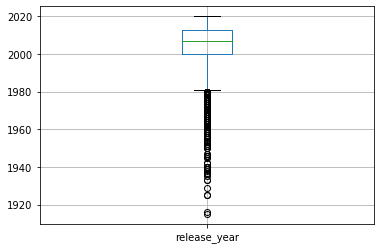

In [15]:
df[['release_year']].boxplot()

## 옛날 영화를 이상치라고 할 순 없음. 단 분석 시점은 2019년이므로 2019, 2020년 영화 제거

In [16]:
df[df['inv_exist']==1]['release_year'].unique()

array([2015., 2018., 2007., 2017., 2016., 2009., 2013., 2014., 2012.,
       2006., 2010., 2011., 2008., 2005.])

In [17]:
df[(df['release_year'] == 2019) | (df['release_year'] == 2020)]

,movie_id,title,release_year,release_date,runtime,mpa_rating,imdb_score,dvd_sales,blu_sales,total_sales,...,country_2,country_3,dvd_over_income,movie_down_sales,contract_price_inf,net_profit,studio,studio_score,price_class,contract_price
0,tt4154796,Avengers: Endgame,2019.0,43581.0,181.0,PG-13,8.5,19581271.0,69437591.0,89018862.0,...,NaN,NaN,0.022812,NaN,NaN,NaN,BUENA VISTA,10.0,10.0,1000.0
10,tt6105098,The Lion King,2019.0,43665.0,118.0,PG,6.9,16106589.0,31098360.0,47204949.0,...,NaN,NaN,0.029627,NaN,NaN,NaN,BUENA VISTA,10.0,1.0,730.0
44,tt1979376,Toy Story 4,2019.0,43637.0,89.0,G,7.9,15922295.0,33742242.0,49664537.0,...,NaN,NaN,0.036684,NaN,NaN,NaN,BUENA VISTA,10.0,10.0,1000.0
57,tt6806448,Fast & Furious Presents: Hobbs & Shaw,2019.0,43679.0,134.0,PG-13,6.5,13100134.0,17129294.0,30229428.0,...,NaN,NaN,0.075307,NaN,NaN,NaN,Universal,10.0,1.0,730.0
63,tt6565702,X-Men: Dark Phoenix,2019.0,43623.0,114.0,PG-13,5.8,6710063.0,14236962.0,20947025.0,...,Canada,NaN,0.101905,NaN,NaN,NaN,20th Century Fox,10.0,1.0,730.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5089,tt8079248,Yesterday,2019.0,43644.0,112.0,PG-13,6.9,2539290.0,3730419.0,6269709.0,...,Russia,China,0.034649,NaN,NaN,NaN,Universal,10.0,1.0,730.0
5098,tt2395469,Gully Boy,2019.0,43510.0,153.0,NOT RATED,8.2,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
5099,tt7721800,Bharat,2019.0,43621.0,150.0,NOT RATED,5.4,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
5117,tt2452244,Isn't It Romantic,2019.0,43509.0,88.0,PG-13,5.9,1340119.0,1268340.0,2608459.0,...,NaN,NaN,0.027466,NaN,NaN,NaN,WB,10.0,1.0,730.0


In [18]:
# 2019년, 2020년 영화 제거
df = df[(df['release_year'] != 2019) & (df['release_year'] != 2020)]

In [19]:
len(df)

4990

In [20]:
5139 - 149

4990

# release date 없는 행 제거

In [21]:
df['release_date'].isna().sum()

14

In [22]:
df = df[df['release_date'].isna() == False]
len(df)

4976

In [23]:
4990 - 14

4976

In [24]:
df[df['mpa_rating'].isna()]

,movie_id,title,release_year,release_date,runtime,mpa_rating,imdb_score,dvd_sales,blu_sales,total_sales,...,country_2,country_3,dvd_over_income,movie_down_sales,contract_price_inf,net_profit,studio,studio_score,price_class,contract_price
420,tt5026378,Kingsman: The Secret Service Revealed,2015.0,42163.0,129.0,NaN,7.8,17997226.0,20460518.0,38457744.0,...,NaN,NaN,0.140316,NaN,NaN,NaN,20th Century Fox,10.0,10.0,1000.0
470,tt7232438,The Promise,2017.0,42985.0,134.0,NaN,6.0,722724.0,233067.0,955791.0,...,NaN,NaN,0.087877,NaN,NaN,NaN,GDH,4.0,1.0,610.0
514,tt1804538,Father's Day,1997.0,35559.0,98.0,NaN,8.6,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN
570,tt5649074,D챕j횪 Vu,2006.0,38795.0,126.0,NaN,NaN,40598932.0,NaN,40598932.0,...,NaN,NaN,0.633976,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1017,tt4047068,Bullet to the Head: Mayhem Inc.,2013.0,41471.0,91.0,NaN,6.8,7753120.0,2758681.0,10511801.0,...,NaN,NaN,0.816993,NaN,NaN,NaN,NaN,NaN,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4731,tt1144804,Incredible Love,2009.0,39997.0,135.0,NaN,3.9,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
4759,tt3142688,Finding Fanny,2014.0,41894.0,102.0,NaN,5.8,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,FIP,6.0,1.0,650.0
4981,tt4814290,Te3n,2016.0,42531.0,133.0,NaN,7.2,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Relbig.,6.0,1.0,650.0
5067,tt3554418,Khoobsurat,2014.0,41901.0,130.0,NaN,6.4,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,UTV,4.0,1.0,610.0


## mpa등급이 없는 영화는 미국에서 개봉하지 않았거나 making film으로 판단하여 제거

In [25]:
df = df[df['mpa_rating'].isna() == False]

In [26]:
len(df)

4874

In [27]:
4976 - 102

4874

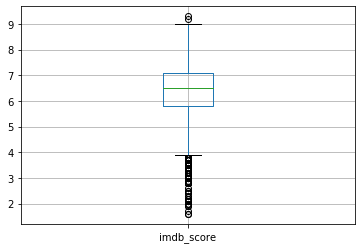

In [28]:
df[['imdb_score']].boxplot()

In [29]:
df[df['imdb_score'].isna()]

,movie_id,title,release_year,release_date,runtime,mpa_rating,imdb_score,dvd_sales,blu_sales,total_sales,...,country_2,country_3,dvd_over_income,movie_down_sales,contract_price_inf,net_profit,studio,studio_score,price_class,contract_price
2695,tt4064028,Hoodwinked,2006.0,38777.0,80.0,NOT RATED,NaN,31481373.0,NaN,31481373.0,...,NaN,NaN,0.612638,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4044,tt8332674,Truth or Dare,2018.0,43197.0,100.0,TV-MA,NaN,1164859.0,NaN,1164859.0,...,NaN,NaN,0.028129,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## IMDB score 없는 영화 제거

In [30]:
df = df[df['imdb_score'].isna() == False]

In [31]:
len(df)

4872

In [32]:
4874 - 2 

4872

In [33]:
df['inf_income_usa'].isna().sum()

332

In [34]:
df['income_usa'].isna().sum()

169

In [35]:
df = df.reset_index()

In [36]:
# inf_income_usa 결측치 중 income_usa는 존재하는 df
df[(df['inf_income_usa'].isna() == True) & (df['income_usa'].isna() == False)]

,index,movie_id,title,release_year,release_date,runtime,mpa_rating,imdb_score,dvd_sales,blu_sales,...,country_2,country_3,dvd_over_income,movie_down_sales,contract_price_inf,net_profit,studio,studio_score,price_class,contract_price
567,608,tt5851562,Renegades,2017.0,42767.0,105.0,PG-13,6.8,1861106.0,805457.0,...,NaN,NaN,1.223066,NaN,NaN,NaN,NaN,NaN,1.0,NaN
1214,1285,tt0249516,Foodfight!,2012.0,41317.0,91.0,PG,1.6,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Lions,4.0,1.0,610.0
1237,1309,tt0056937,Cleopatra,1963.0,23223.0,248.0,G,7.0,200620.0,2541867.0,...,UK,USA,0.003520,NaN,NaN,NaN,20th Century Fox,10.0,1.0,730.0
1586,1667,tt1540128,Playing for Keeps,2012.0,41250.0,105.0,PG-13,5.7,2502909.0,835135.0,...,NaN,NaN,0.191014,NaN,NaN,NaN,FD,6.0,1.0,650.0
1838,1928,tt1935194,Overdrive,2017.0,43014.0,93.0,PG-13,5.4,NaN,NaN,...,Belgium,USA,NaN,NaN,NaN,NaN,Paramount,6.0,1.0,650.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4307,4560,tt0006333,"20,000 Leagues Under the Sea",1916.0,6203.0,105.0,PASSED,6.2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Universal,10.0,1.0,730.0
4326,4581,tt0034587,Cat People,1942.0,15700.0,73.0,NOT RATED,7.3,NaN,730008.0,...,NaN,NaN,NaN,NaN,NaN,NaN,RKO,4.0,1.0,610.0
4328,4583,tt0063350,Night of the Living Dead,1968.0,25115.0,96.0,NOT RATED,7.9,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,WalterR,1.0,1.0,550.0
4329,4584,tt0004972,The Birth of a Nation,1915.0,5559.0,190.0,TV-PG,6.4,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Epoch,1.0,1.0,550.0


In [37]:
df[df['movie_id'] == 'tt5851562'][['income_usa','inf_income_usa']]

,income_usa,inf_income_usa
567,1521672.0,NaN


## 가장 가까운 날짜의 inflation으로 income_usa만 있는 row의 inf_income_usa를 구함

In [38]:
df['inf'].isna().sum()

334

In [39]:
df[df['inf_income_usa'].isna()]

,index,movie_id,title,release_year,release_date,runtime,mpa_rating,imdb_score,dvd_sales,blu_sales,...,country_2,country_3,dvd_over_income,movie_down_sales,contract_price_inf,net_profit,studio,studio_score,price_class,contract_price
439,472,tt5519340,Bright,2017.0,43091.0,117.0,TV-MA,6.3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
567,608,tt5851562,Renegades,2017.0,42767.0,105.0,PG-13,6.8,1861106.0,805457.0,...,NaN,NaN,1.223066,NaN,NaN,NaN,NaN,NaN,1.0,NaN
758,805,tt4743226,Air Strike,2018.0,43399.0,97.0,R,3.2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,LIONSGATE,6.0,NaN,NaN
1214,1285,tt0249516,Foodfight!,2012.0,41317.0,91.0,PG,1.6,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Lions,4.0,1.0,610.0
1237,1309,tt0056937,Cleopatra,1963.0,23223.0,248.0,G,7.0,200620.0,2541867.0,...,UK,USA,0.003520,NaN,NaN,NaN,20th Century Fox,10.0,1.0,730.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4856,5136,tt1786751,CBGB,2013.0,41558.0,81.0,R,6.6,730891.0,105704.0,...,NaN,NaN,NaN,NaN,NaN,NaN,XL,2.0,NaN,NaN
4858,5138,tt5108476,Befikre,2016.0,42713.0,132.0,NOT RATED,3.9,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Yash,6.0,NaN,NaN
4865,5146,tt6588966,Hichki,2018.0,43182.0,106.0,NOT RATED,7.5,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Yash,6.0,NaN,NaN
4866,5147,tt6527426,Zero,2018.0,43455.0,164.0,NOT RATED,5.5,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Yash,6.0,NaN,NaN


In [40]:
df[(df['inf'].isna()) & (df['inf_income_usa'].isna() == False)]['income_usa']

# income이 0과 nan인 income_usa의 존재 때문에 inf와 inf_income_usa가 2개 차이남

1335    0.0
4348    NaN
Name: income_usa, dtype: float64

In [41]:
# def inflation():
#     global df
#     df['inf'] = np.nan
#     for i in df.index:
#             if (math.isnan(df.loc[i, 'inf_income_usa']) == False) & (math.isnan(df.loc[i, 'income_usa']) == False) & (
#                     df.loc[i, 'income_usa'] != 0):
#                     df.loc[i, 'inf'] = float(df.loc[i, 'inf_income_usa']) / float(df.loc[i, 'income_usa'])
#             else:
#                     pass
# inflation()

In [42]:
df['inf'].isna().sum()

334

In [43]:
# df = df.reset_index()
a = 0
for i in df.index:
    temp = {}
    if (math.isnan(df['inf_income_usa'][i]) == True) & (math.isnan(df['income_usa'][i]) == False):
        for j in df[df['inf'].isna() == False].index:
            if i != j:
                temp.update({abs(df['release_date'][i] - df['release_date'][j]) : j})
                
        df['inf_income_usa'][i] = df['income_usa'][i] * df['inf'][temp.get(min(temp.keys()))]
        print(df['inf_income_usa'][i], i, df['income_usa'][i], df['inf'][temp.get(min(temp.keys()))], temp.get(min(temp.keys())))
        a += 1
print(a)

C:\Users\cresc\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


1545421.5216084241 567 1521672.0 1.015607517 2044
52032.32765016 1214 46435.0 1.120541136 1867
75470038.263 1237 57000000.0 1.324035759 4287
14996066.567623958 1586 13103272.0 1.144452055 3592
7911.9858619 1838 7793.0 1.0152683 4840
34971058.84333285 2041 29548291.0 1.1835222159999998 4086
18291581.78423727 2062 17368022.0 1.0531758759999998 4493
474451.56947229593 2133 400881.0 1.1835222159999998 4086
214940620.9477732 2159 52614445.0 4.085201715 3766
5917611.079999999 2222 5000000.0 1.1835222159999998 4086
17161072.132 2325 14500000.0 1.1835222159999998 4086
20487246.20291475 2374 15473333.0 1.324035759 4287
9468177.727999998 2413 8000000.0 1.1835222159999998 4086
4695191.203685401 2481 2119994.0 2.2147191000000004 1973
29483514.882660717 2522 24911670.0 1.1835222159999998 4086
13535.650375007 2564 12139.0 1.115054813 4170
95330574.648 2581 72000000.0 1.324035759 4287
13240357.59 2603 10000000.0 1.324035759 4287
96654610.407 2690 73000000.0 1.324035759 4287
49645230.53747222 2715 374

In [54]:
df.loc[4871]['income_usa']

3262954.0

In [44]:
df['inf_income_usa'].isna().sum()

168

In [45]:
332 - 164

168

### inf 결측치 대체

In [55]:
def inflation():
    global df
    df['inf'] = np.nan
    for i in df.index:
            if (math.isnan(df.loc[i, 'inf_income_usa']) == False) & (math.isnan(df.loc[i, 'income_usa']) == False) & (
                    df.loc[i, 'income_usa'] != 0):
                    df.loc[i, 'inf'] = float(df.loc[i, 'inf_income_usa']) / float(df.loc[i, 'income_usa'])
            else:
                    pass
inflation()

In [56]:
df['inf'].isna().sum()

170

In [57]:
df[(df['inf_income_usa'].isna() == True) & (df['income_usa'].isna() == False)]

,index,movie_id,title,release_year,release_date,runtime,mpa_rating,imdb_score,dvd_sales,blu_sales,...,country_2,country_3,dvd_over_income,movie_down_sales,contract_price_inf,net_profit,studio,studio_score,price_class,contract_price


In [58]:
df['theater_opening'].isna().sum()

462

In [61]:
df['theater_total'].isna().sum()

462

In [62]:
df[df['theater_total'].isna()]

,index,movie_id,title,release_year,release_date,runtime,mpa_rating,imdb_score,dvd_sales,blu_sales,...,country_2,country_3,dvd_over_income,movie_down_sales,contract_price_inf,net_profit,studio,studio_score,price_class,contract_price
439,472,tt5519340,Bright,2017.0,43091.0,117.0,TV-MA,6.3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
567,608,tt5851562,Renegades,2017.0,42767.0,105.0,PG-13,6.8,1861106.0,805457.0,...,NaN,NaN,1.223066,NaN,NaN,NaN,NaN,NaN,1.0,NaN
758,805,tt4743226,Air Strike,2018.0,43399.0,97.0,R,3.2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,LIONSGATE,6.0,NaN,NaN
1201,1272,tt0149624,All the Pretty Horses,2000.0,36885.0,117.0,PG-13,5.8,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Sony Pictures/Columbia,10.0,1.0,730.0
1214,1285,tt0249516,Foodfight!,2012.0,41317.0,91.0,PG,1.6,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Lions,4.0,1.0,610.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4856,5136,tt1786751,CBGB,2013.0,41558.0,81.0,R,6.6,730891.0,105704.0,...,NaN,NaN,NaN,NaN,NaN,NaN,XL,2.0,NaN,NaN
4858,5138,tt5108476,Befikre,2016.0,42713.0,132.0,NOT RATED,3.9,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Yash,6.0,NaN,NaN
4865,5146,tt6588966,Hichki,2018.0,43182.0,106.0,NOT RATED,7.5,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Yash,6.0,NaN,NaN
4866,5147,tt6527426,Zero,2018.0,43455.0,164.0,NOT RATED,5.5,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Yash,6.0,NaN,NaN


## 전체 관측치의 10% 해당하는 값을 imputation하는 것은 무리가 있지 않을까 -> tv series거나 개봉 자체를 하지 않은 것으로 판단 -> imdb프로에 나옴...내일 아침에 스크래핑

In [64]:
df['src'].isna().sum()

110

In [65]:
df[df['src'].isna() == True]

,index,movie_id,title,release_year,release_date,runtime,mpa_rating,imdb_score,dvd_sales,blu_sales,...,country_2,country_3,dvd_over_income,movie_down_sales,contract_price_inf,net_profit,studio,studio_score,price_class,contract_price
524,561,tt0383216,The Pink Panther,2006.0,38758.0,93.0,PG,5.7,23233504.0,NaN,...,Czech Republic,NaN,0.282555,NaN,NaN,NaN,SonR,6.0,1.0,650.0
960,1015,tt0279111,Gods and Generals,2003.0,37673.0,219.0,PG-13,6.4,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,WB,10.0,1.0,730.0
1222,1293,tt0080855,Heaven's Gate,1980.0,29544.0,219.0,R,6.8,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,UA,4.0,1.0,610.0
1401,1479,tt0081400,Raise the Titanic,1980.0,29434.0,115.0,PG,4.9,NaN,NaN,...,USA,NaN,NaN,NaN,NaN,NaN,AFD,4.0,1.0,610.0
1410,1489,tt0091757,Pirates,1986.0,31611.0,121.0,PG-13,6.1,NaN,NaN,...,Tunisia,NaN,NaN,NaN,NaN,NaN,MGM,6.0,1.0,650.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4718,4989,tt2356180,Bhaag Milkha Bhaag,2013.0,41467.0,189.0,NOT RATED,8.2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Relbig.,6.0,1.0,650.0
4738,5010,tt1194263,Get Low,2009.0,40417.0,100.0,PG-13,7.0,4675066.0,1287009.0,...,Germany,Poland,0.509437,NaN,NaN,NaN,SPC,4.0,1.0,610.0
4771,5043,tt0838232,The Pink Panther 2,2009.0,39850.0,92.0,PG,5.6,8185437.0,NaN,...,NaN,NaN,0.227861,NaN,NaN,NaN,Sony Pictures/Columbia,10.0,3.0,790.0
4868,5149,tt5970844,Thugs of Hindostan,2018.0,43412.0,164.0,NOT RATED,4.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Yash,6.0,1.0,650.0


In [67]:
df['src'].value_counts()

original screenplay                    2572
based on fiction book/short story       954
based on real life events               357
remake                                  189
based on comic/graphic novel            152
based on tv                             152
based on factual book/article           120
based on play                            77
based on folk tale/legend/fairytale      41
based on game                            33
spin-off                                 23
based on short film                      20
based on religious text                  19
based on musical or opera                16
based on toy                             12
based on movie                            8
based on theme park ride                  6
compilation                               3
based on comic/graphic Novel              2
based on ballet                           2
based on musical group                    2
based on song                             1
based on web series             

## src의 50% 이상을 차지하는 최빈값으로 대체

In [68]:
nan_idx = np.argwhere([df['src'].isna()])
for i in nan_idx:
    df['src'][i[1]] = 'original screenplay'

C:\Users\cresc\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [69]:
len(df)

4872

In [70]:
df['src'].isna().sum()

0

In [35]:
df['creative_type'].isna().sum()

139

In [36]:
df['creative_type'].value_counts()

contemporary fiction       2540
historical fiction          523
dramatization               435
science fiction             415
fantasy                     382
kids fiction                269
super hero                   92
factual                      72
multiple creative types       5
Name: creative_type, dtype: int64

In [37]:
df[df['creative_type'].isna()]

,index,movie_id,title,release_year,release_date,runtime,mpa_rating,imdb_score,dvd_sales,blu_sales,...,country_2,country_3,dvd_over_income,movie_down_sales,contract_price_inf,net_profit,studio,studio_score,price_class,contract_price
1112,1176,tt0098987,The Adventures of Ford Fairlane,1990.0,33065.0,102.0,R,6.5,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,20th Century Fox,10.0,1.0,730.0
1194,1264,tt0109836,Mary Shelley's Frankenstein,1994.0,34642.0,123.0,R,6.4,NaN,NaN,...,Japan,UK,NaN,NaN,NaN,NaN,TriS,10.0,1.0,730.0
1222,1293,tt0080855,Heaven's Gate,1980.0,29544.0,219.0,R,6.8,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,UA,4.0,1.0,610.0
1401,1479,tt0081400,Raise the Titanic,1980.0,29434.0,115.0,PG,4.9,NaN,NaN,...,USA,NaN,NaN,NaN,NaN,NaN,AFD,4.0,1.0,610.0
1410,1489,tt0091757,Pirates,1986.0,31611.0,121.0,PG-13,6.1,NaN,NaN,...,Tunisia,NaN,NaN,NaN,NaN,NaN,MGM,6.0,1.0,650.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4738,5010,tt1194263,Get Low,2009.0,40417.0,100.0,PG-13,7.0,4675066.0,1287009.0,...,Germany,Poland,0.509437,NaN,NaN,NaN,SPC,4.0,1.0,610.0
4783,5055,tt0370986,Mysterious Skin,2004.0,38527.0,105.0,NC-17,7.6,384785.0,NaN,...,Netherlands,NaN,0.539489,NaN,NaN,NaN,TLA,NaN,1.0,NaN
4859,5139,tt0375611,Black,2005.0,38387.0,122.0,NOT RATED,8.2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Yash,6.0,1.0,650.0
4868,5149,tt5970844,Thugs of Hindostan,2018.0,43412.0,164.0,NOT RATED,4.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Yash,6.0,1.0,650.0


# creative_type 최빈값으로 대체...?

In [38]:
df[df['metascore'].isna()]

,index,movie_id,title,release_year,release_date,runtime,mpa_rating,imdb_score,dvd_sales,blu_sales,...,country_2,country_3,dvd_over_income,movie_down_sales,contract_price_inf,net_profit,studio,studio_score,price_class,contract_price
273,294,tt3113456,Doomed: The Untold Story of Roger Corman's the...,2015.0,42195.0,100.0,NOT RATED,6.9,7128128.0,6379230.0,...,NaN,NaN,0.127021,NaN,NaN,NaN,NaN,NaN,1.0,NaN
476,510,tt0113492,Judge Dredd,1995.0,34880.0,96.0,R,5.6,NaN,121773.0,...,NaN,NaN,NaN,NaN,NaN,NaN,BUENA VISTA,10.0,3.0,790.0
546,585,tt0116040,Daylight,1996.0,35405.0,114.0,PG-13,5.9,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Universal,10.0,3.0,790.0
567,608,tt5851562,Renegades,2017.0,42767.0,105.0,PG-13,6.8,1861106.0,805457.0,...,NaN,NaN,1.223066,NaN,NaN,NaN,NaN,NaN,1.0,NaN
608,650,tt0113071,First Knight,1995.0,34887.0,134.0,PG-13,6.0,NaN,NaN,...,UK,NaN,NaN,NaN,NaN,NaN,Sony Pictures/Columbia,10.0,3.0,790.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4867,5148,tt5997666,Jab Harry Met Sejal,2017.0,42951.0,144.0,NOT RATED,5.3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
4868,5149,tt5970844,Thugs of Hindostan,2018.0,43412.0,164.0,NOT RATED,4.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Yash,6.0,1.0,650.0
4869,5150,tt5956100,Tiger Zinda Hai,2017.0,43091.0,145.0,NOT RATED,6.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Yash,6.0,1.0,650.0
4870,5151,tt5882970,Tubelight,2017.0,42909.0,170.0,NOT RATED,4.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Yash,6.0,1.0,650.0


## 기준 모호 creative_type column 자체 삭제

# metascore 선형회귀로 imputation 가능할듯

In [71]:
df[df['reviews_users'].isna()]

,index,movie_id,title,release_year,release_date,runtime,mpa_rating,imdb_score,dvd_sales,blu_sales,...,country_2,country_3,dvd_over_income,movie_down_sales,contract_price_inf,net_profit,studio,studio_score,price_class,contract_price
567,608,tt5851562,Renegades,2017.0,42767.0,105.0,PG-13,6.8,1861106.0,805457.0,...,NaN,NaN,1.223066,NaN,NaN,NaN,NaN,NaN,1.0,NaN
1787,1874,tt6245710,Black Ballerina,2016.0,42614.0,89.0,TV-G,8.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
2214,2321,tt2150592,Hit & Run,2012.0,41001.0,95.0,NOT RATED,6.5,3699157.0,1759375.0,...,NaN,NaN,0.269043,NaN,NaN,NaN,Allodox,4.0,1.0,610.0
3932,4156,tt1145855,Holly Hobbie and Friends: Best Friends Forever,2007.0,39343.0,44.0,NOT RATED,5.8,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
4355,4614,tt1230136,Grip: A Criminal's Story,2006.0,38835.0,119.0,NOT RATED,3.5,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,JeTi,1.0,1.0,550.0


In [72]:
df[df['reviews_critics'].isna()]

,index,movie_id,title,release_year,release_date,runtime,mpa_rating,imdb_score,dvd_sales,blu_sales,...,country_2,country_3,dvd_over_income,movie_down_sales,contract_price_inf,net_profit,studio,studio_score,price_class,contract_price
567,608,tt5851562,Renegades,2017.0,42767.0,105.0,PG-13,6.8,1861106.0,805457.0,...,NaN,NaN,1.223066,NaN,NaN,NaN,NaN,NaN,1.0,NaN
1787,1874,tt6245710,Black Ballerina,2016.0,42614.0,89.0,TV-G,8.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
2214,2321,tt2150592,Hit & Run,2012.0,41001.0,95.0,NOT RATED,6.5,3699157.0,1759375.0,...,NaN,NaN,0.269043,NaN,NaN,NaN,Allodox,4.0,1.0,610.0
2858,2996,tt0362582,El d챠a que me amen,2003.0,37784.0,110.0,NOT RATED,6.3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
3737,3939,tt0977662,Out of the Blue: A Film About Life and Football,2007.0,39322.0,90.0,NOT RATED,8.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
3932,4156,tt1145855,Holly Hobbie and Friends: Best Friends Forever,2007.0,39343.0,44.0,NOT RATED,5.8,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
4081,4312,tt1006959,Songs from Tsongas: Yes 35th Anniversary Concert,2005.0,42064.0,178.0,NC-17,8.2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
4191,4428,tt0428609,Guiana 1838,2004.0,38254.0,120.0,NC-17,7.4,NaN,NaN,...,Guyana,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
4201,4439,tt0401462,The Helix... Loaded,2005.0,38427.0,97.0,R,2.1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,41,2.0,1.0,570.0
4242,4484,tt1074931,Arnolds Park,2007.0,39283.0,103.0,PG-13,4.4,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,TMovie,1.0,1.0,550.0


## reviews_users와 reviews_critics는 0이 결측치로 나타난 것. 0으로 결측치 대체

In [73]:
for i in df.index:
    if math.isnan(df['reviews_users'][i]):
        df['reviews_users'][i] = 0
    if math.isnan(df['reviews_critics'][i]):
        df['reviews_critics'][i] = 0

C:\Users\cresc\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\cresc\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [74]:
df[df['reviews_users'].isna()]

,index,movie_id,title,release_year,release_date,runtime,mpa_rating,imdb_score,dvd_sales,blu_sales,...,country_2,country_3,dvd_over_income,movie_down_sales,contract_price_inf,net_profit,studio,studio_score,price_class,contract_price


In [75]:
df[df['reviews_critics'].isna()]

,index,movie_id,title,release_year,release_date,runtime,mpa_rating,imdb_score,dvd_sales,blu_sales,...,country_2,country_3,dvd_over_income,movie_down_sales,contract_price_inf,net_profit,studio,studio_score,price_class,contract_price


In [76]:
len(df)

4872

In [77]:
df['prd_mthd'].value_counts()

live action                    4394
digital animation               155
animation/live action           135
Live Action                      52
hand animation                   51
stop-motion animation            12
rotoscoping                       2
multiple production methods       1
contemporary fiction              1
Animation/Live Action             1
Hand Animation                    1
Name: prd_mthd, dtype: int64

In [78]:
df[df['prd_mthd'].isna()]

,index,movie_id,title,release_year,release_date,runtime,mpa_rating,imdb_score,dvd_sales,blu_sales,...,country_2,country_3,dvd_over_income,movie_down_sales,contract_price_inf,net_profit,studio,studio_score,price_class,contract_price
46,49,tt1014759,Alice in Wonderland,2010.0,40242.0,108.0,PG,6.4,86473124.0,35126381.0,...,NaN,NaN,0.258754,NaN,NaN,NaN,BUENA VISTA,10.0,1.0,730.0
333,355,tt0133152,Planet of the Apes,2001.0,37099.0,120.0,PG-13,5.7,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,20th Century Fox,10.0,1.0,730.0
729,774,tt2788732,Pete's Dragon,2016.0,42594.0,103.0,PG,6.7,11996137.0,15521689.0,...,NaN,NaN,0.157361,NaN,NaN,NaN,BUENA VISTA,10.0,1.0,730.0
1222,1293,tt0080855,Heaven's Gate,1980.0,29544.0,219.0,R,6.8,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,UA,4.0,1.0,610.0
1401,1479,tt0081400,Raise the Titanic,1980.0,29434.0,115.0,PG,4.9,NaN,NaN,...,USA,NaN,NaN,NaN,NaN,NaN,AFD,4.0,1.0,610.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4573,4842,tt0989000,In Search of a Midnight Kiss,2007.0,39661.0,90.0,NOT RATED,7.2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,IFC,4.0,1.0,610.0
4641,4910,tt1133993,Serious Moonlight,2009.0,40151.0,81.0,R,5.4,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Magn.,4.0,1.0,610.0
4703,4973,tt1285309,The Joneses,2009.0,40291.0,96.0,R,6.5,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,RAtt.,6.0,1.0,650.0
4718,4989,tt2356180,Bhaag Milkha Bhaag,2013.0,41467.0,189.0,NOT RATED,8.2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Relbig.,6.0,1.0,650.0


# prd_mthd 결측치 최빈값으로 대체

In [79]:
nan_idx = np.argwhere([df['prd_mthd'].isna()])
for i in nan_idx:
    df['prd_mthd'][i[1]] = 'live action'

C:\Users\cresc\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [80]:
df['prd_mthd'].isna().sum()

0

In [81]:
len(df)

4872

In [82]:
df['budget'].isna().sum()

182

In [83]:
df['income_opening'].isna().sum()

290

In [84]:
df['votes'].isna().sum()

0

In [85]:
df['income_usa'].isna().sum()

169

In [86]:
df['income_ww'].isna().sum()

316

In [87]:
df['inf'].isna().sum()

170

In [88]:
df['inf_income_usa'].isna().sum()

168

In [89]:
df['dvd_over_income'].isna().sum()

2701

In [34]:
len(df[df['genre_action'] == 1])

1257

In [90]:
# column 삭제
len(df[df['genre_adult'] == 1])

0

In [91]:
len(df[df['genre_adventure'] == 1])

967

In [92]:
len(df[df['genre_animation'] == 1])

246

In [93]:
len(df[df['genre_biography'] == 1])

383

In [94]:
len(df[df['genre_comedy'] == 1])

1929

In [95]:
len(df[df['genre_crime'] == 1])

895

In [96]:
len(df[df['genre_documentary'] == 1])

73

In [97]:
len(df[df['genre_drama'] == 1])

2580

In [98]:
len(df[df['genre_family'] == 1])

559

In [99]:
len(df[df['genre_fantasy'] == 1])

620

In [100]:
len(df[df['genre_film-noir'] == 1])

6

In [102]:
# column 삭제
df[df['genre_film-noir'] == 1]['genre']

3998           Drama, Film-Noir, Romance, Thriller
4055    Crime, Drama, Film-Noir, Mystery, Thriller
4096         Film-Noir, Mystery, Romance, Thriller
4128                           Film-Noir, Thriller
4133                    Crime, Film-Noir, Thriller
4138                              Drama, Film-Noir
Name: genre, dtype: object

장르가 누아르만 존재하는 영화는 없으므로 삭제

In [46]:
# column 삭제
len(df[df['genre_game-show'] == 1])

0

In [47]:
len(df[df['genre_history'] == 1])

236

In [48]:
len(df[df['genre_horror'] == 1])

529

In [49]:
len(df[df['genre_music'] == 1])

224

In [50]:
len(df[df['genre_musical'] == 1])

139

In [51]:
len(df[df['genre_mystery'] == 1])

542

In [52]:
len(df[df['genre_news'] == 1])

3

In [103]:
# column 삭제
df[df['genre_news'] == 1]['genre']

2377    Documentary, Crime, News
4105           Documentary, News
4155           Documentary, News
Name: genre, dtype: object

In [53]:
# column 삭제
len(df[df['genre_reality-tv'] == 1])

0

In [54]:
len(df[df['genre_romance'] == 1])

1125

In [55]:
len(df[df['genre_sci-fi'] == 1])

613

In [56]:
len(df[df['genre_short'] == 1])

2

In [106]:
# column 삭제
df[df['genre_short'] == 1]['genre']

2214         Short, Comedy
3681    Documentary, Short
Name: genre, dtype: object

In [108]:
len(df[df['genre_sport'] == 1])

194

In [107]:
# column 삭제
len(df[df['genre_talk-show'] == 1])

0

In [59]:
len(df[df['genre_thriller'] == 1])

1475

In [60]:
len(df[df['genre_war'] == 1])

215

In [61]:
len(df[df['genre_western'] == 1])

98

In [109]:
df['studio'].isna().sum()

127

In [110]:
df[df['studio'].isna()]

,index,movie_id,title,release_year,release_date,runtime,mpa_rating,imdb_score,dvd_sales,blu_sales,...,country_2,country_3,dvd_over_income,movie_down_sales,contract_price_inf,net_profit,studio,studio_score,price_class,contract_price
273,294,tt3113456,Doomed: The Untold Story of Roger Corman's the...,2015.0,42195.0,100.0,NOT RATED,6.9,7128128.0,6379230.0,...,NaN,NaN,0.127021,NaN,NaN,NaN,NaN,NaN,1.0,NaN
439,472,tt5519340,Bright,2017.0,43091.0,117.0,TV-MA,6.3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
567,608,tt5851562,Renegades,2017.0,42767.0,105.0,PG-13,6.8,1861106.0,805457.0,...,NaN,NaN,1.223066,NaN,NaN,NaN,NaN,NaN,1.0,NaN
760,807,tt0156934,Random Hearts,1999.0,36441.0,133.0,R,5.2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN
865,915,tt0119081,Event Horizon,1997.0,35657.0,96.0,R,6.7,NaN,NaN,...,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4794,5068,tt3390572,Haider,2014.0,41914.0,124.0,NOT RATED,8.1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
4797,5071,tt0449994,Jodhaa Akbar,2008.0,39493.0,213.0,NOT RATED,7.6,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
4803,5078,tt4682788,Loving Pablo,2017.0,43266.0,123.0,R,6.3,16630.0,43123.0,...,Bulgaria,NaN,0.755325,NaN,NaN,NaN,NaN,NaN,1.0,NaN
4864,5144,tt7431594,Race 3,2018.0,43266.0,160.0,NOT RATED,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN


# studio 값이 없는 영화는 판권 가격을 추정할 수 없으므로 삭제

In [111]:
df = df[df['studio'].isna() == False]

In [112]:
len(df)

4745

In [113]:
4872 - 127

4745

In [114]:
df['studio_score'].isna().sum()

8

In [115]:
df['price_class'].isna().sum()

158

In [116]:
df['contract_price'].isna().sum()

166